<a href="https://colab.research.google.com/github/drjhero/BlogProjects/blob/master/seabornIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn
Seaborn is a python library for making graphs and charts that are not bad looking.

It works directly with the pandas data structures we have worked with so far in this class. Seaborn usually can create a graph that is close to what you want if the data is in a sane format.

In [3]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips") # Returns a pandas dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


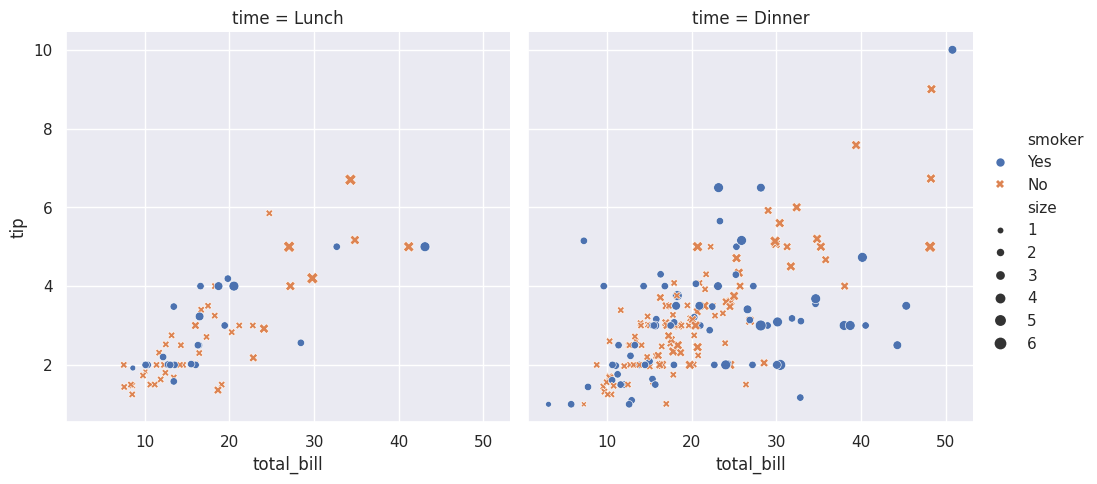

In [4]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker",
    style="smoker",
    size="size",
)

## Relplot
replot() supports a ton of different relationships, hence the "rel" in relplot(). Using the "kind" parameter we can use the same function to get different visual styles showing different statistical relationships in the data.

Note that all the sample datasets have more info on [seaborn's github](https://github.com/mwaskom/seaborn-data/blob/master/README.md).

In [6]:
dots = sns.load_dataset("dots") # This is like neurons firing in the brain in response to visual stimulation or something
dots.head()


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


Notice how relplot reuses some of the same parameters as the graph above. This makes it easy to cycle through different kinds of representations.

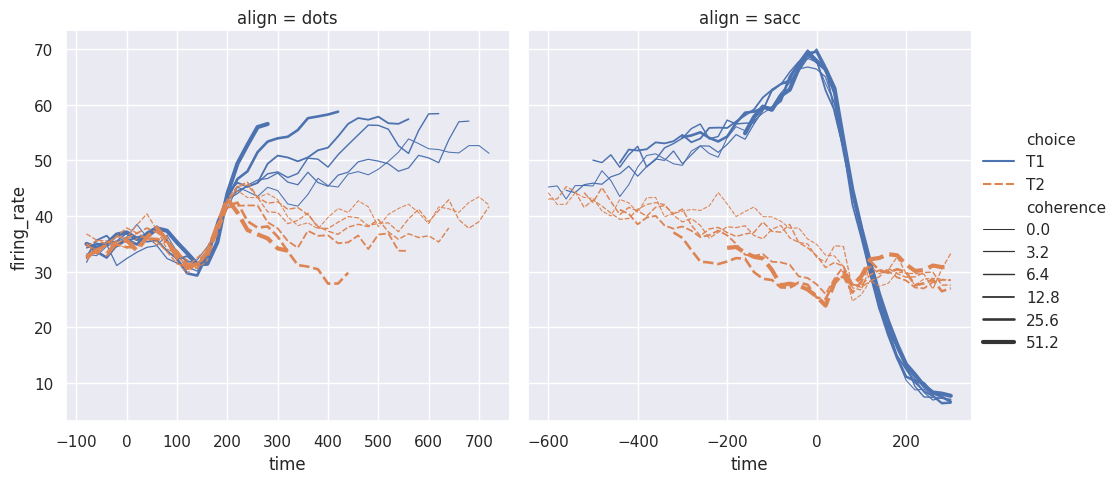

In [11]:
sns.relplot(
    data=dots,
    kind="line",
    x="time",
    y="firing_rate",
    col="align",
    hue="choice",
    size="coherence",
    style="choice",
    facet_kws=dict(sharex=False), # Should the two graphs share the same min/max x axis (as they do in the y axis)
)

## Statistical Estimation
Seaborn will also visualize all kinds of statistical measures and estimates for us and often does so by default, for example the confidence intervals in the chart below.

In [8]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


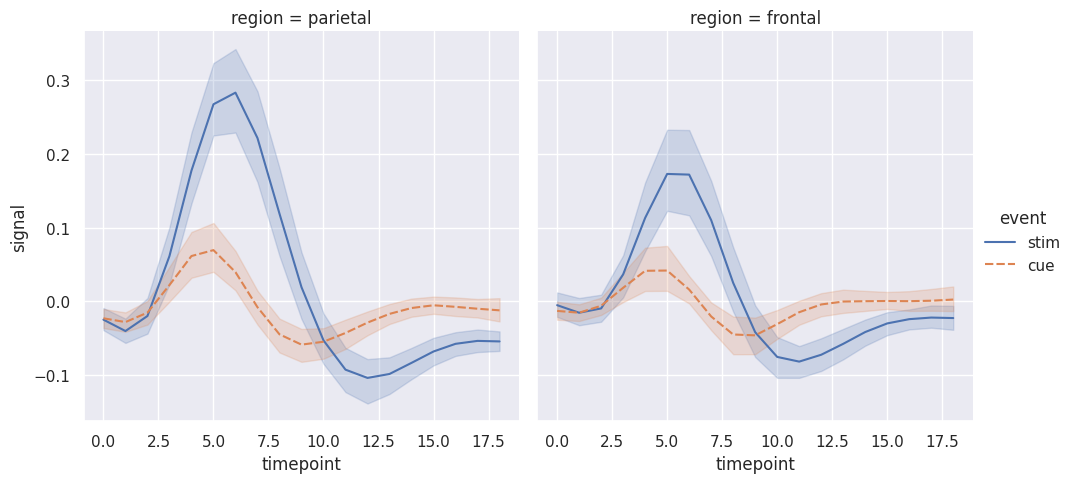

In [9]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    col="region",
    hue="event",
    style="event",
)

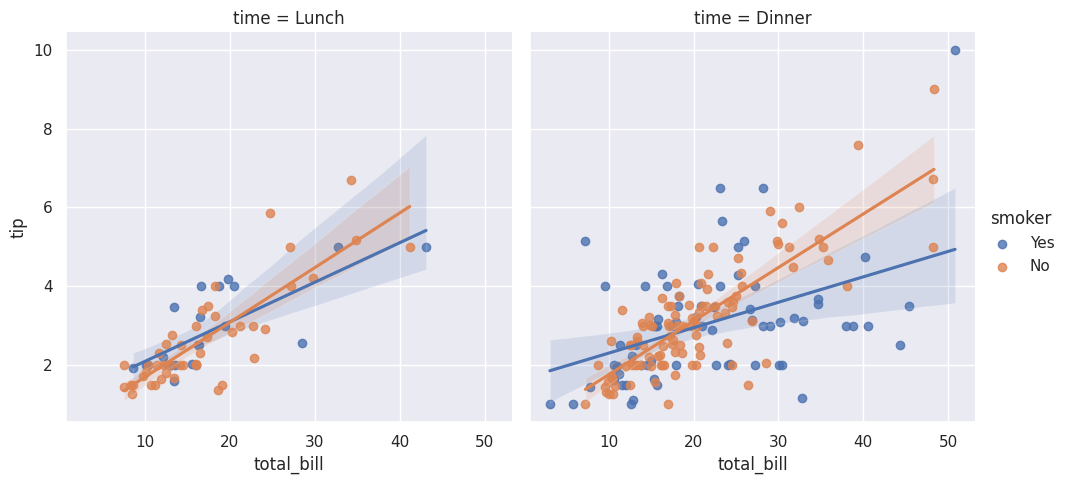

In [12]:
# We can decorate our graph with linear regression lines
sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker"
)

## Distributions
Seaborn has support for displaying quantile like distributions and uses KDE to visual them.

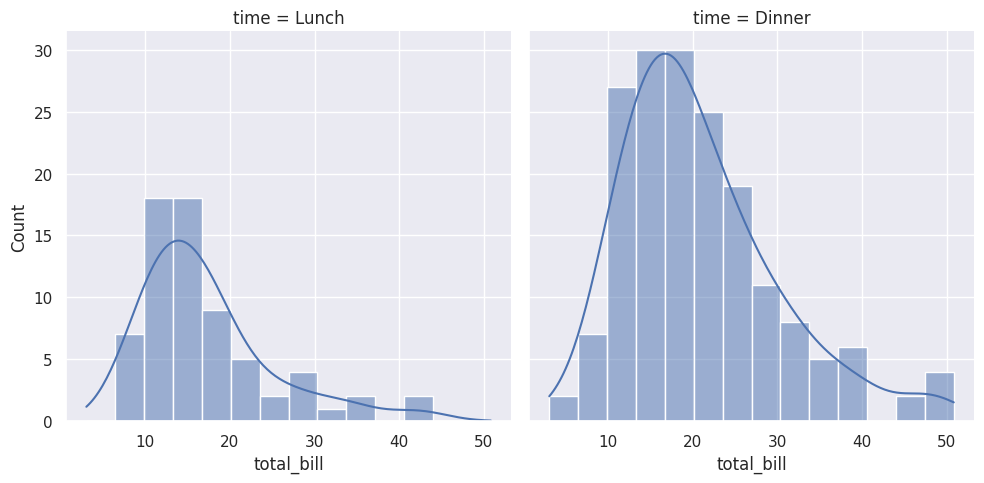

In [13]:
sns.displot(
    data=tips,
    x="total_bill",
    col="time",
    kde=True
  )

## Categorical Data
Often the data we work with is not real-valued but instead comprises different categories, for example days of the week. Seaborn has many interesting visualizations for this.

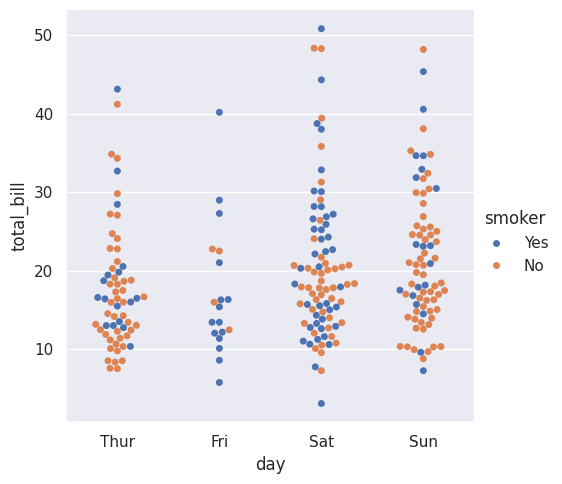

In [14]:
sns.catplot(
    data=tips,
    kind="swarm",
    x="day",
    y="total_bill",
    hue="smoker"
)

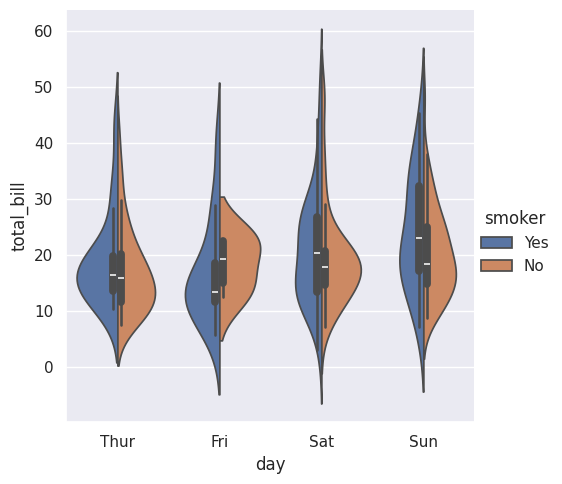

In [16]:
# Look at this crazy shit that uses KDE for each day AND for smoker/non-smoker
# Which is similar to what we see above. We'll go in depth on these later
sns.catplot(
    data=tips,
    kind="violin",
    x="day",
    y="total_bill",
    hue="smoker",
    split=True
)

## Multivariate datasets and Multiple plots
Seaborn has support for showing a combination of plots in one spot and gracefully handles multivariate data.

One of my favorites is pairplot() which generates plots for all possible combinations of variables; this saves a lot of time.

In [17]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


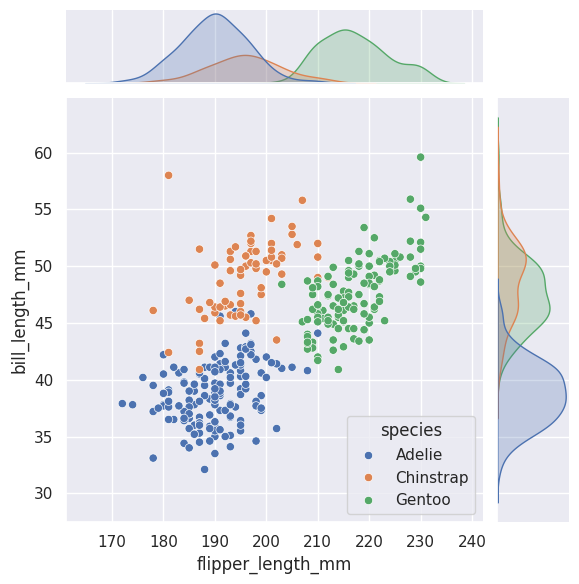

In [18]:
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species"
)

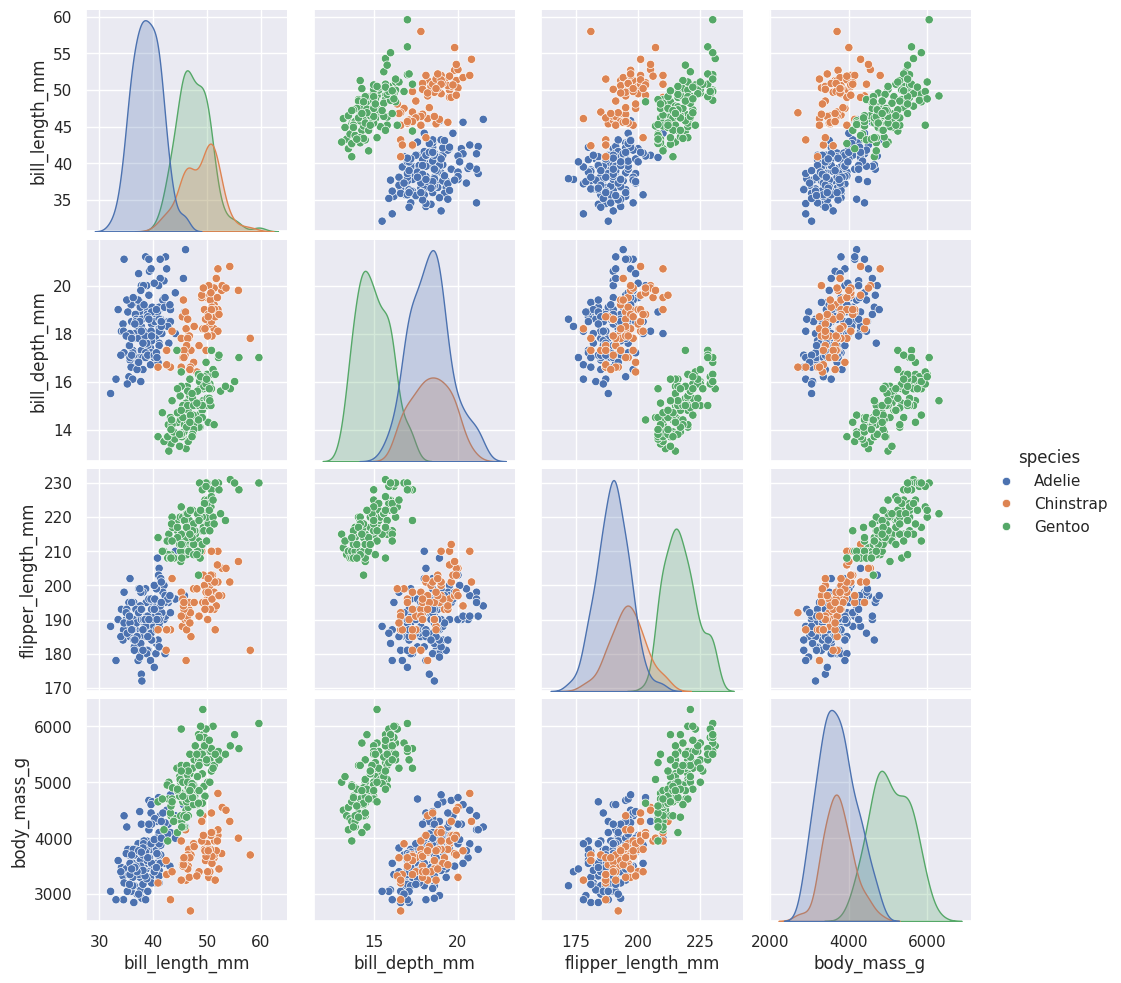

In [19]:
sns.pairplot(
    data=penguins,
    hue="species"
)